Dữ liệu được cung cấp trong file income_spending.csv, chứa thông tin khảo sát về thu nhập, thói quen chi tiêu và tiết kiệm của một nhóm người dân. 

Bộ dữ liệu bao gồm các cột sau: 
- age: Tuổi (năm)
- gender: Giới tính (nam = 'M', nữ = 'F')
- income: Thu nhập hàng năm (USD)
- expenses: Chi tiêu hàng tháng (USD)
- savings: Số tiền tiết kiệm hàng tháng (USD)
- education: Trình độ học vấn (High School, Bachelor, Master, PhD)
- marital_status: Tình trạng hôn nhân (Single, Married, Divorced, Widowed)
- loan_status: Có đang vay nợ không? (1 = Có, 0 = Không)
- investment: Có đang đầu tư không? (1 = Có, 0 = Không)

- Bạn hãy viết mã Python để trả lời các câu hỏi sau:

**Câu 1: (7 điểm, CLO 1)**

a. (2 điểm) Tìm hiểu một số thông tin về bộ dữ liệu: 

- Hiển thị 5 dòng đầu tiên của bộ dữ liệu. 

- Cho biết dữ liệu có kích thước bao nhiêu dòng và bao nhiêu cột? Dữ liệu có giá trị trống không?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('income_spending.csv')

# 1a) Tổng quan
display(df.head())
print("Số dòng:", df.shape[0])
print("Số cột:", df.shape[1])
print("\nSố lượng giá trị thiếu:")
print(df.isna().sum())


,age,gender,income,expenses,savings,education,marital_status,loan_status,investment
0,22,F,42202,1599.04,1878.98,Bachelor,Single,0,1
1,59,F,117080,4432.72,5142.33,PhD,Married,0,1
2,52,F,55991,2175.50,2631.86,Bachelor,Divorced,0,0
3,41,F,54655,2189.00,2185.66,Bachelor,Married,1,0
4,40,F,100361,2786.11,5550.55,Master,Single,0,1


Số dòng: 1000
Số cột: 9

Số lượng giá trị thiếu:
age               0
gender            0
income            0
expenses          0
savings           0
education         0
marital_status    0
loan_status       0
investment        0
dtype: int64


**Nhận xét: dữ liệu sạch (không NA), 1000 dòng × 9 cột**

**b. (2 điểm)** Dựa trên dữ liệu, hãy tính toán hoặc so sánh một số thông tin sau: 

- Tính giá trị trung bình, trung vị và độ lệch chuẩn của thu nhập (income) theo từng nhóm giới tính.
- So sánh trung bình thu nhập giữa các nhóm có vay nợ (loan_status = 1) và không vay nợ (loan_status = 0).

In [3]:
# 1b) Thống kê/so sánh
# Thu nhập theo giới
stats_gender = df.groupby("gender")["income"].agg(["mean","median","std"])
display(stats_gender)

# Thu nhập theo loan_status
stats_loan = df.groupby("loan_status")["income"].mean().rename("mean_income")
display(stats_loan)

# Gợi ý nhận xét
m_mean = stats_gender.loc["M","mean"]
f_mean = stats_gender.loc["F","mean"]
print("Thu nhập TB Nam cao hơn Nữ." if m_mean>f_mean else " Thu nhập TB Nữ cao hơn hoặc xấp xỉ Nam.")
print("Nhóm có vay nợ thu nhập TB cao hơn." if stats_loan.loc[1]>stats_loan.loc[0] else " Nhóm không vay nợ thu nhập TB cao hơn.")


,mean,median,std
gender,,,
F,49174.655804,43310.0,24771.105485
M,49972.088409,44661.0,25142.798968


loan_status
0    51310.975477
1    44805.612782
Name: mean_income, dtype: float64

Thu nhập TB Nam cao hơn Nữ.
 Nhóm không vay nợ thu nhập TB cao hơn.


**c. (2 điểm)** Phân tích nhóm đối tượng trung niên với các đặc điểm sau: 

- Tuổi từ 30 đến 50 Thu nhập trên mức trung vị của toàn bộ dữ liệu. Chi tiêu ít hơn 40% thu nhập hàng tháng

**Yêu cẩu:**

- Tính số lượng người trong nhóm này và so sánh tỷ lệ của họ so với toàn bộ tập dữ liệu.
- Tính giá trị trung bình của thu nhập, chi tiêu và tiết kiệm của nhóm này

In [4]:
# 1c) Nhóm trung niên
median_income = df["income"].median()
mid_age = (df["age"].between(30,50))
high_income = df["income"] > median_income
low_exp_ratio = (df["expenses"]*12) < (0.4 * df["income"])
mid_group = df[mid_age & high_income & low_exp_ratio]

count_mid = len(mid_group)
ratio_mid = count_mid / len(df)
print("Số người nhóm trung niên:", count_mid)
print(f"Tỷ lệ so với toàn bộ: {ratio_mid*100:.2f}%")

mean_vals = mid_group[["income","expenses","savings"]].mean()
display(mean_vals)

# Nhận xét gợi ý
print(" Nhóm trung niên có tài chính tương đối vững: thu nhập cao, chi tiêu < 40% thu nhập, tiết kiệm dương (trung bình).")


Số người nhóm trung niên: 86
Tỷ lệ so với toàn bộ: 8.60%


income      75610.988372
expenses     2284.458721
savings      4008.244651
dtype: float64

 Nhóm trung niên có tài chính tương đối vững: thu nhập cao, chi tiêu < 40% thu nhập, tiết kiệm dương (trung bình).


**d. (2 điểm) Vẽ biểu đồ:** Vẽ biểu đồ tán xạ (scatter plot) với trục X cho thu nhập (income) và trục Y cho chi tiêu (expenses). 

- Tô màu các dấu điểm theo nhóm giới tính.
- Vẽ biểu đồ hộp (box plot) cho thu nhập (income) theo trình độ học vấn (education).

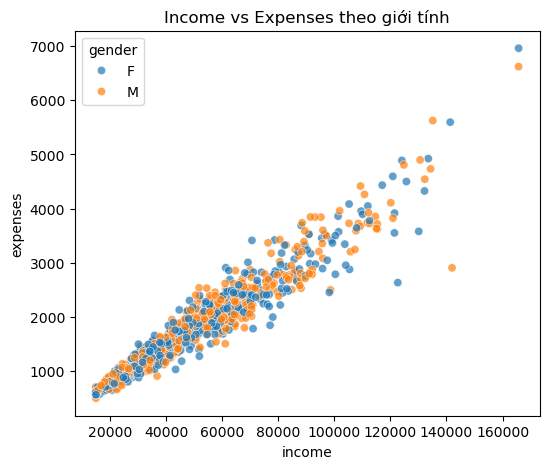

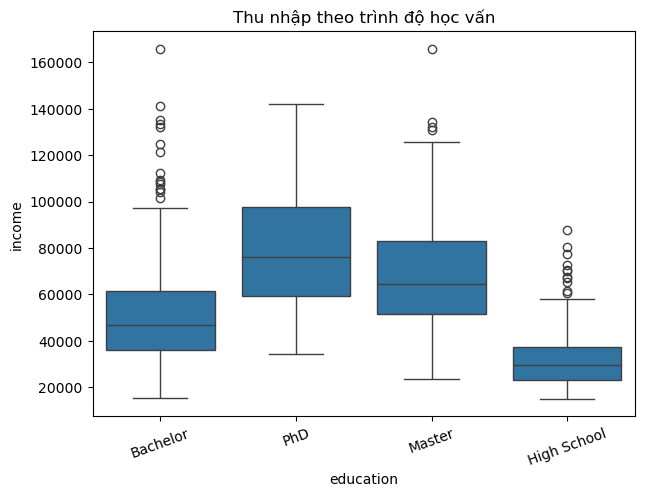

 Thu nhập tăng → chi tiêu tăng nhưng không tỷ lệ 1:1; giới tính khác nhau về mức chi.
 Thu nhập thường tăng theo học vấn (PhD > Master > Bachelor > High School) nhưng vẫn có outliers.


In [5]:
# 1d) Biểu đồ
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x="income", y="expenses", hue="gender", alpha=0.7)
plt.title("Income vs Expenses theo giới tính")
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="education", y="income")
plt.title("Thu nhập theo trình độ học vấn")
plt.xticks(rotation=20)
plt.show()

# Nhận xét gợi ý:
print(" Thu nhập tăng → chi tiêu tăng nhưng không tỷ lệ 1:1; giới tính khác nhau về mức chi.")
print(" Thu nhập thường tăng theo học vấn (PhD > Master > Bachelor > High School) nhưng vẫn có outliers.")


## PHẦN 2 – LẤY MẪU NGẪU NHIÊN & MÔ PHỎNG

**Câu 2: (2 điểm, CLO 2)**

- Sử dụng hàm df.sample() để lấy mẫu ngẫu nhiên 100 dòng từ bộ dữ liệu.
- Tính giá trị trung bình thu nhập (income) của mẫu này.

- Lấy mẫu ngẫu nhiên n = 50 từ bộ dữ liệu và tính trung bình thu nhập trong mẫu. Lặp lại quá trình trên 100 lần và vẽ histogram phân bố của các giá trị trung bình mẫu.

- Lặp lại với n = 100, 200 và so sánh kết quả giữa các kích thước mẫu.

- Nhận xét về sự thay đổi của trung bình mẫu khi kích thước mẫu tăng.

In [6]:
import numpy as np

# 2a) Lấy mẫu 100 dòng
sample100 = df.sample(100, random_state=1)
print("Trung bình thu nhập mẫu n=100:", sample100["income"].mean())


Trung bình thu nhập mẫu n=100: 49722.6


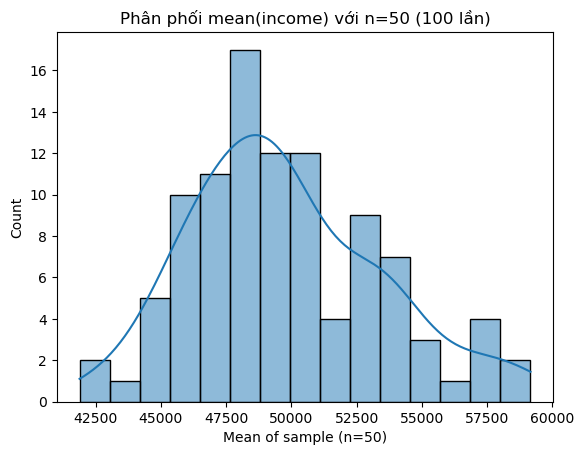

In [7]:
# 2b) Lặp 100 lần với n=50 → histogram trung bình mẫu
means_50 = [df.sample(50)["income"].mean() for _ in range(100)]
sns.histplot(means_50, bins=15, kde=True)
plt.title("Phân phối mean(income) với n=50 (100 lần)")
plt.xlabel("Mean of sample (n=50)")
plt.show()


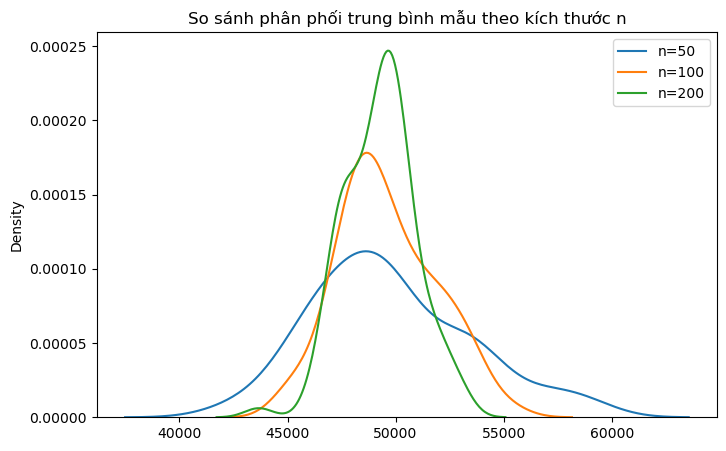

👉 n càng lớn → phân phối trung bình mẫu càng hẹp, dao động nhỏ, tiến gần trung bình tổng thể (CLT).


In [8]:
# 2c) So sánh n = 50, 100, 200
means_100 = [df.sample(100)["income"].mean() for _ in range(100)]
means_200 = [df.sample(200)["income"].mean() for _ in range(100)]

plt.figure(figsize=(8,5))
sns.kdeplot(means_50, label="n=50")
sns.kdeplot(means_100, label="n=100")
sns.kdeplot(means_200, label="n=200")
plt.title("So sánh phân phối trung bình mẫu theo kích thước n")
plt.legend()
plt.show()

# Nhận xét:
print("👉 n càng lớn → phân phối trung bình mẫu càng hẹp, dao động nhỏ, tiến gần trung bình tổng thể (CLT).")


Thu nhập theo giới/loan: chênh lệch phản ánh khác biệt hành vi tài chính; vay nợ có thể gắn với thu nhập đủ tiêu chuẩn vay hoặc nhu cầu chi tiêu lớn.

Nhóm trung niên: tiêu chuẩn 3-điều kiện giúp xác định nhóm tài chính ổn định; so sánh tỷ lệ để thấy mức phổ biến.

Biểu đồ: scatter cho thấy tương quan dương income–expenses; boxplot cho thấy bậc học càng cao thu nhập càng cao, nhưng vẫn có ngoại lệ.

Lấy mẫu: khi tăng kích thước mẫu, độ biến thiên của trung bình mẫu giảm → ước lượng ổn định hơn (minh hoạ định lý giới hạn trung tâm).

In [ ]:
#b. (1đ) Tính MPG trung bình theo số xi-lanh (Cylinders)
mean_mpg = df.groupby('Cylinders')['MPG'].mean().reset_index()
print(mean_mpg)

#c. (1đ) Tạo cột mới PowerToWeightRatio = Horsepower / Weight
df['PowerToWeightRatio'] = df['Horsepower'] / df['Weight']
df.head()


#d. (1đ) Lọc ra các xe có MPG > 35 và Origin = 'Japan'
filtered = df[(df['MPG'] > 35) & (df['Origin'] == 'Japan')]
print(filtered)

#e. (0.5đ) Vẽ biểu đồ scatter thể hiện quan hệ giữa Horsepower và MPG
plt.scatter(df['Horsepower'], df['MPG'], alpha=0.6)
plt.title('Quan hệ giữa Horsepower và MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

==================================================================================================

#c. (1đ) Tính tuổi trung bình theo từng hạng vé (Pclass)
mean_age = df.groupby('Pclass')['Age'].mean().reset_index()
print(mean_age)


#d. (1đ) Tính tỷ lệ sống sót theo giới tính (Sex)
survival_rate = df.groupby('Sex')['Survived'].mean().reset_index()
print(survival_rate)

# e. (0.5đ) Vẽ biểu đồ Bar cho kết quả trên
import matplotlib.pyplot as plt

plt.bar(survival_rate['Sex'], survival_rate['Survived'], color=['steelblue','salmon'])
plt.title('Tỷ lệ sống sót theo giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Tỷ lệ sống sót')
plt.ylim(0,1)
plt.show()





In [ ]:
#b. (1đ) Tính tuổi trung bình của hành khách sống sót theo từng hạng vé (Pclass) và giới tính (Sex)
#(gợi ý: dùng groupby với danh sách cột)

In [ ]:
mean_age_survived = (
    df[df['Survived'] == 1]
    .groupby(['Pclass', 'Sex'])['Age']
    .mean()
    .reset_index()
)
print(mean_age_survived)


In [ ]:
##c. (1đ) Lọc ra hành khách có giá vé (Fare) lớn hơn trung bình và tuổi (Age) lớn hơn trung bình
#Tạo DataFrame mới tên rich_old và in ra 10 dòng đầu tiên

In [ ]:
fare_mean = df['Fare'].mean()
age_mean = df['Age'].mean()

rich_old = df[(df['Fare'] > fare_mean) & (df['Age'] > age_mean)]
print(rich_old.head(10))


**d. (1đ) Tính tỷ lệ sống sót trung bình theo cả giới tính và hạng vé, sau đó biểu diễn bằng biểu đồ cột nhóm**

(Mỗi Pclass là một nhóm, hai cột nam/nữ)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

survival = df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
print(survival)

# Vẽ biểu đồ cột nhóm
plt.figure(figsize=(8,5))
x = np.arange(len(survival.index))
plt.bar(x - 0.2, survival['male'], width=0.4, label='Nam')
plt.bar(x + 0.2, survival['female'], width=0.4, label='Nữ')
plt.xticks(x, survival.index)
plt.xlabel('Hạng vé')
plt.ylabel('Tỉ lệ sống sót')
plt.title('Tỉ lệ sống sót theo giới tính và hạng vé')
plt.legend()
plt.ylim(0,1)
plt.show()